In [2]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
# %matplotlib inline

In [74]:
max_n_columns = 21
max_n_rows = 7043

pd.set_option('display.max_rows', int(f'{max_n_rows}'))
pd.set_option('display.max_columns', int(f'{max_n_columns}'))

In [6]:
from functions import p_null,is_constant,low_var,col_row_duplicated

In [7]:
path_arquivo = 'archive/WA_Fn-UseC_-Telco-Customer-Churn.csv'

with open(path_arquivo) as f:
    row_count = sum(1 for row in f) - 1
    
row_count

7043

In [18]:
df = pd.read_csv('archive/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
df.shape

(7043, 21)

In [12]:
p_null(df)

No null in customerID
No null in gender
No null in SeniorCitizen
No null in Partner
No null in Dependents
No null in tenure
No null in PhoneService
No null in MultipleLines
No null in InternetService
No null in OnlineSecurity
No null in OnlineBackup
No null in DeviceProtection
No null in TechSupport
No null in StreamingTV
No null in StreamingMovies
No null in Contract
No null in PaperlessBilling
No null in PaymentMethod
No null in MonthlyCharges
No null in TotalCharges
No null in Churn

The columns with the most % nulls are:
customerID          0.0
DeviceProtection    0.0
TotalCharges        0.0
MonthlyCharges      0.0
PaymentMethod       0.0
PaperlessBilling    0.0
Contract            0.0
StreamingMovies     0.0
StreamingTV         0.0
TechSupport         0.0
OnlineBackup        0.0
gender              0.0
OnlineSecurity      0.0
InternetService     0.0
MultipleLines       0.0
PhoneService        0.0
tenure              0.0
Dependents          0.0
Partner             0.0
SeniorCitizen

In [21]:
col_row_duplicated(df)

Não há linhas duplicadas no conjunto de dados.
Não há colunas duplicadas no conjunto de dados.


In [22]:
is_constant(df)

customerID OK!
gender OK!
SeniorCitizen OK!
Partner OK!
Dependents OK!
tenure OK!
PhoneService OK!
MultipleLines OK!
InternetService OK!
OnlineSecurity OK!
OnlineBackup OK!
DeviceProtection OK!
TechSupport OK!
StreamingTV OK!
StreamingMovies OK!
Contract OK!
PaperlessBilling OK!
PaymentMethod OK!
MonthlyCharges OK!
TotalCharges OK!
Churn OK!
-=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=--=-
The % of cte column is: 0.000% 
The % of not cte columns is: 100.000%


In [23]:
low_var(df)

SeniorCitizen: 0.13586  OK!
tenure: 0.11634  OK!
MonthlyCharges: 0.08963  OK!
A(s) coluna(s) com baixa variância:  []


[]

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [29]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [46]:
df['Churn'] = np.where(df['Churn'] == 'Yes', 1, 0)
df['gender'] = np.where(df['gender'] == 'Male', 1, 0)
df['SeniorCitizen'] = np.where(df['SeniorCitizen'] == 'Yes', 1, 0)
df['Partner'] = np.where(df['Partner'] == 'Yes', 1, 0)
df['Dependents'] = np.where(df['Dependents'] == 'Yes', 1, 0)
df['PaperlessBilling'] = np.where(df['PaperlessBilling'] == 'Yes', 1, 0)

In [15]:
df['PhoneService'] = np.where(df['PhoneService'] == 'Yes', 1, 0)
df['StreamingMovies'] = np.where(df['StreamingMovies'] == 'Yes', 1, 0)
df['StreamingTV'] = np.where(df['StreamingTV'] == 'Yes', 1, 0)
df['TechSupport'] = np.where(df['TechSupport'] == 'Yes', 1, 0)
df['OnlineBackup'] = np.where(df['OnlineBackup'] == 'Yes', 1, 0)

In [31]:
df.nunique().sort_values()

Churn                  2
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PaperlessBilling       2
PhoneService           2
Contract               3
StreamingMovies        3
StreamingTV            3
TechSupport            3
OnlineBackup           3
OnlineSecurity         3
InternetService        3
MultipleLines          3
DeviceProtection       3
PaymentMethod          4
tenure                73
MonthlyCharges      1585
TotalCharges        6531
customerID          7043
dtype: int64

In [34]:
df.Contract.unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [35]:
df.StreamingMovies.unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [40]:
df.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [45]:
df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int32  
 1   SeniorCitizen     7043 non-null   int32  
 2   Partner           7043 non-null   int32  
 3   Dependents        7043 non-null   int32  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   int32  
 16  PaymentMethod     7043 non-null   object 


In [52]:
df = df.drop('customerID', axis=1)

In [54]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.5,0
2,1,0,0,0,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


In [57]:
var_qualitativas_ordinais = []

In [56]:
var_qualitativas_nominais = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines',
                             'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                             'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','Churn']

In [58]:
var_quantitativa_discreta = ['tenure']

In [59]:
var_quantitativa_continua = ['MonthlyCharges','TotalCharges']

In [113]:
for var in df[var_quantitativa_continua]:
    df[var] = df[var].astype('float64')

In [ ]:
for var in df[var_quantitativa_continua]:
    df[var] = df[var].astype('float64')

In [114]:
df[var_quantitativa_continua].dtypes

MonthlyCharges    float64
TotalCharges      float64
dtype: object

In [70]:
df[var_qualitativas_nominais].dtypes

gender              category
SeniorCitizen       category
Partner             category
Dependents          category
PhoneService        category
MultipleLines       category
InternetService     category
OnlineSecurity      category
OnlineBackup        category
DeviceProtection    category
TechSupport         category
StreamingTV         category
StreamingMovies     category
Contract            category
PaperlessBilling    category
PaymentMethod       category
Churn               category
dtype: object

In [159]:
var_categoricas = ['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines',
                             'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport',
                             'StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']
var_numericas = ['MonthlyCharges','TotalCharges','tenure']#
target = 'Churn'

In [258]:
from functions import EDA

In [160]:
var_quantitativa_discreta, var_quantitativa_continua, target

(['tenure'], ['MonthlyCharges', 'TotalCharges'], 'Churn')

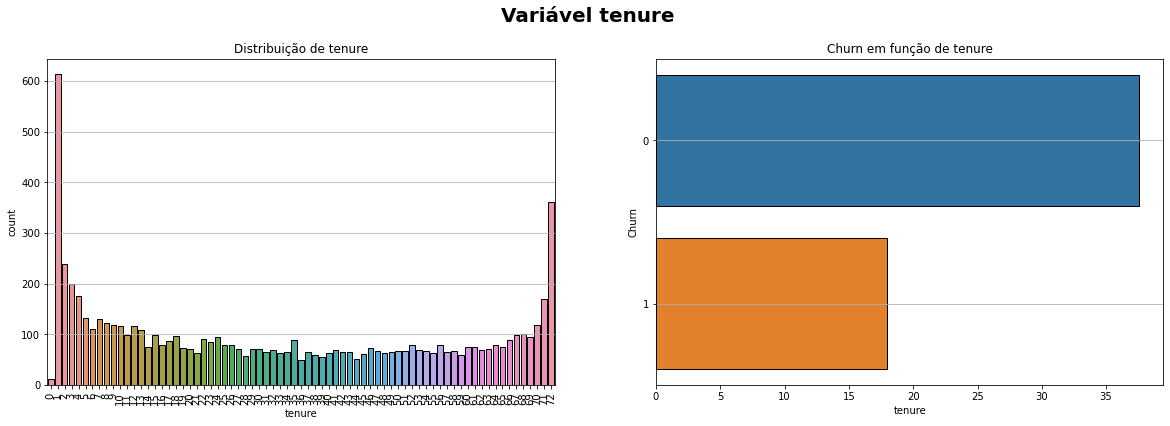

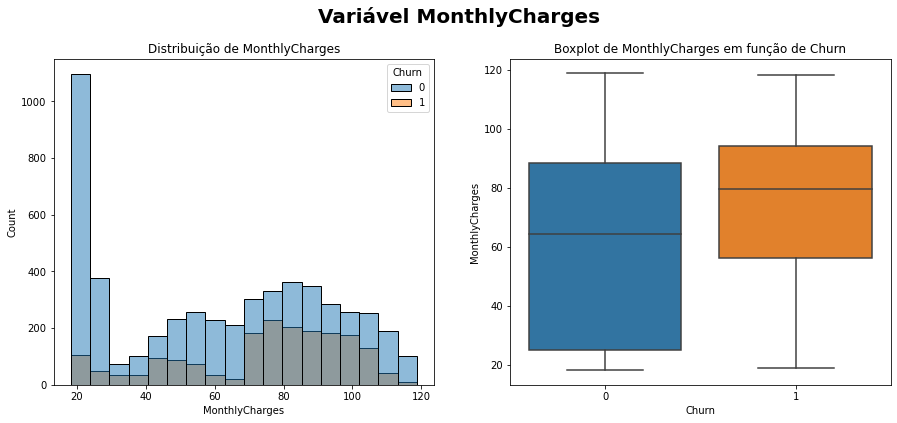

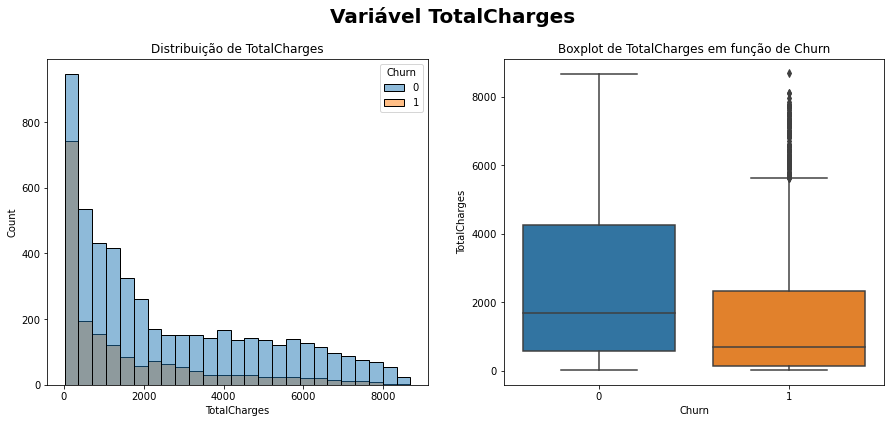

In [261]:
EDA(df, var_quantitativa_discreta,var_quantitativa_continua,target)

In [163]:
percentual_df = []
for variavel in var_categoricas:
    percentual = df[variavel].value_counts(normalize=True)*100
    percentual_df.append(percentual)
    display(percentual)

1    50.47565
0    49.52435
Name: gender, dtype: float64

0    100.0
Name: SeniorCitizen, dtype: float64

0    51.69672
1    48.30328
Name: Partner, dtype: float64

0    70.041176
1    29.958824
Name: Dependents, dtype: float64

Yes    90.316626
No      9.683374
Name: PhoneService, dtype: float64

No                  48.132898
Yes                 42.183729
No phone service     9.683374
Name: MultipleLines, dtype: float64

Fiber optic    43.958540
DSL            34.374556
No             21.666903
Name: InternetService, dtype: float64

No                     49.666335
Yes                    28.666761
No internet service    21.666903
Name: OnlineSecurity, dtype: float64

No                     43.844952
Yes                    34.488144
No internet service    21.666903
Name: OnlineBackup, dtype: float64

No                     43.944342
Yes                    34.388755
No internet service    21.666903
Name: DeviceProtection, dtype: float64

No                     49.311373
Yes                    29.021724
No internet service    21.666903
Name: TechSupport, dtype: float64

No                     39.897771
Yes                    38.435326
No internet service    21.666903
Name: StreamingTV, dtype: float64

No                     39.542808
Yes                    38.790288
No internet service    21.666903
Name: StreamingMovies, dtype: float64

Month-to-month    55.019168
Two year          24.066449
One year          20.914383
Name: Contract, dtype: float64

1    59.221922
0    40.778078
Name: PaperlessBilling, dtype: float64

Electronic check             33.579441
Mailed check                 22.887974
Bank transfer (automatic)    21.922476
Credit card (automatic)      21.610109
Name: PaymentMethod, dtype: float64

In [178]:
list_chrun = ['Churn','Churn','Churn','Churn','Churn','Churn','Churn','Churn','Churn','Churn','Churn','Churn','Churn','Churn','Churn','Churn']

In [182]:
df[['gender', 'Churn']].value_counts(normalize=True)*100

gender  Churn
1       0        37.271049
0       0        36.191964
        1        13.332387
1       1        13.204600
dtype: float64

In [203]:
#var_cat_Churn = zip(var_categoricas,list_chrun)
for i in var_categoricas:
        print(f"df['{i}','Churn']")
        p = df[[i,'Churn']].value_counts(normalize=True)*100
        display(p)

df['gender','Churn']


gender  Churn
1       0        37.271049
0       0        36.191964
        1        13.332387
1       1        13.204600
dtype: float64

df['SeniorCitizen','Churn']


SeniorCitizen  Churn
0              0        73.463013
               1        26.536987
dtype: float64

df['Partner','Churn']


Partner  Churn
1        0        38.804487
0        0        34.658526
         1        17.038194
1        1         9.498793
dtype: float64

df['Dependents','Churn']


Dependents  Churn
0           0        48.132898
1           0        25.330115
0           1        21.908278
1           1         4.628709
dtype: float64

df['PhoneService','Churn']


PhoneService  Churn
Yes           0        66.193384
              1        24.123243
No            0         7.269629
              1         2.413744
dtype: float64

df['MultipleLines','Churn']


MultipleLines     Churn
No                0        36.078376
Yes               0        30.115008
                  1        12.068721
No                1        12.054522
No phone service  0         7.269629
                  1         2.413744
dtype: float64

df['InternetService','Churn']


InternetService  Churn
DSL              0        27.857447
Fiber optic      0        25.543092
No               0        20.062473
Fiber optic      1        18.415448
DSL              1         6.517109
No               1         1.604430
dtype: float64

df['OnlineSecurity','Churn']


OnlineSecurity       Churn
No                   0        28.922334
Yes                  0        24.478205
No                   1        20.744001
No internet service  0        20.062473
Yes                  1         4.188556
No internet service  1         1.604430
dtype: float64

df['OnlineBackup','Churn']


OnlineBackup         Churn
Yes                  0        27.062331
No                   0        26.338208
No internet service  0        20.062473
No                   1        17.506744
Yes                  1         7.425813
No internet service  1         1.604430
dtype: float64

df['DeviceProtection','Churn']


DeviceProtection     Churn
No                   0        26.749965
Yes                  0        26.650575
No internet service  0        20.062473
No                   1        17.194377
Yes                  1         7.738180
No internet service  1         1.604430
dtype: float64

df['TechSupport','Churn']


TechSupport          Churn
No                   0        28.780349
Yes                  0        24.620190
No                   1        20.531024
No internet service  0        20.062473
Yes                  1         4.401533
No internet service  1         1.604430
dtype: float64

df['StreamingTV','Churn']


StreamingTV          Churn
Yes                  0        26.877751
No                   0        26.522789
No internet service  0        20.062473
No                   1        13.374982
Yes                  1        11.557575
No internet service  1         1.604430
dtype: float64

df['StreamingMovies','Churn']


StreamingMovies      Churn
Yes                  0        27.175919
No                   0        26.224620
No internet service  0        20.062473
No                   1        13.318188
Yes                  1        11.614369
No internet service  1         1.604430
dtype: float64

df['Contract','Churn']


Contract        Churn
Month-to-month  0        31.520659
                1        23.498509
Two year        0        23.384921
One year        0        18.557433
                1         2.356950
Two year        1         0.681528
dtype: float64

df['PaperlessBilling','Churn']


PaperlessBilling  Churn
1                 0        39.344030
0                 0        34.118983
1                 1        19.877893
0                 1         6.659094
dtype: float64

df['PaymentMethod','Churn']


PaymentMethod              Churn
Mailed check               0        18.514837
Electronic check           0        18.372852
Credit card (automatic)    0        18.316058
Bank transfer (automatic)  0        18.259265
Electronic check           1        15.206588
Mailed check               1         4.373136
Bank transfer (automatic)  1         3.663212
Credit card (automatic)    1         3.294051
dtype: float64

In [250]:
def cross(df,dados_linha, dados_coluna):
    '''
    (dataframe, 
    'nome das linhas' - var categorica
    , 'colunas'- var categorica.)
    
    '''
    cross =( pd.crosstab(df[dados_linha],
                        df[dados_coluna],
                        margins=True,
                        margins_name="Total",
                        normalize=True
                        )*100).round(2)
    cross.rename(index=df[dados_linha])
    cross.rename(columns=df[dados_coluna])
    display(cross)

In [253]:
for i in var_categoricas:
    cross(df,i,target)

Churn,0,1,Total
gender,,,
0,36.19,13.33,49.52
1,37.27,13.20,50.48
Total,73.46,26.54,100.00


Churn,0,1,Total
SeniorCitizen,,,
0,73.46,26.54,100.0
Total,73.46,26.54,100.0


Churn,0,1,Total
Partner,,,
0,34.66,17.04,51.7
1,38.80,9.50,48.3
Total,73.46,26.54,100.0


Churn,0,1,Total
Dependents,,,
0,48.13,21.91,70.04
1,25.33,4.63,29.96
Total,73.46,26.54,100.00


Churn,0,1,Total
PhoneService,,,
No,7.27,2.41,9.68
Yes,66.19,24.12,90.32
Total,73.46,26.54,100.00


Churn,0,1,Total
MultipleLines,,,
No,36.08,12.05,48.13
No phone service,7.27,2.41,9.68
Yes,30.12,12.07,42.18
Total,73.46,26.54,100.00


Churn,0,1,Total
InternetService,,,
DSL,27.86,6.52,34.37
Fiber optic,25.54,18.42,43.96
No,20.06,1.60,21.67
Total,73.46,26.54,100.00


Churn,0,1,Total
OnlineSecurity,,,
No,28.92,20.74,49.67
No internet service,20.06,1.60,21.67
Yes,24.48,4.19,28.67
Total,73.46,26.54,100.00


Churn,0,1,Total
OnlineBackup,,,
No,26.34,17.51,43.84
No internet service,20.06,1.60,21.67
Yes,27.06,7.43,34.49
Total,73.46,26.54,100.00


Churn,0,1,Total
DeviceProtection,,,
No,26.75,17.19,43.94
No internet service,20.06,1.60,21.67
Yes,26.65,7.74,34.39
Total,73.46,26.54,100.00


Churn,0,1,Total
TechSupport,,,
No,28.78,20.53,49.31
No internet service,20.06,1.60,21.67
Yes,24.62,4.40,29.02
Total,73.46,26.54,100.00


Churn,0,1,Total
StreamingTV,,,
No,26.52,13.37,39.90
No internet service,20.06,1.60,21.67
Yes,26.88,11.56,38.44
Total,73.46,26.54,100.00


Churn,0,1,Total
StreamingMovies,,,
No,26.22,13.32,39.54
No internet service,20.06,1.60,21.67
Yes,27.18,11.61,38.79
Total,73.46,26.54,100.00


Churn,0,1,Total
Contract,,,
Month-to-month,31.52,23.50,55.02
One year,18.56,2.36,20.91
Two year,23.38,0.68,24.07
Total,73.46,26.54,100.00


Churn,0,1,Total
PaperlessBilling,,,
0,34.12,6.66,40.78
1,39.34,19.88,59.22
Total,73.46,26.54,100.00


Churn,0,1,Total
PaymentMethod,,,
Bank transfer (automatic),18.26,3.66,21.92
Credit card (automatic),18.32,3.29,21.61
Electronic check,18.37,15.21,33.58
Mailed check,18.51,4.37,22.89
Total,73.46,26.54,100.00


In [ ]:
# sns.heatmap(pd.crosstab([df.make, df.num_doors], [df.body_style, df.drive_wheels]),
#             cmap="YlGnBu", annot=True, cbar=False)